In [181]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.datasets
from sklearn.decomposition import PCA, TruncatedSVD

### Nacitaj tvare

In [182]:
_, _, files = list(os.walk("photos64"))[0]

faces = dict()

for f in files:
    f.encode('unicode_escape')
    img = cv2.imread("photos64/"+f)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces[f] = gray


### Nacitanie trenovacieho dataset

In [183]:
images = sklearn.datasets.fetch_olivetti_faces()["images"]

In [184]:
images.shape

(400, 64, 64)

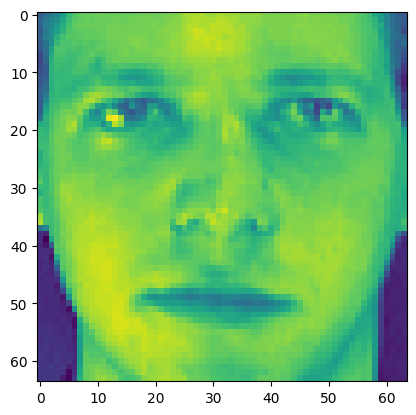

In [185]:
plt.imshow(images[0])

### Priemerna tvar

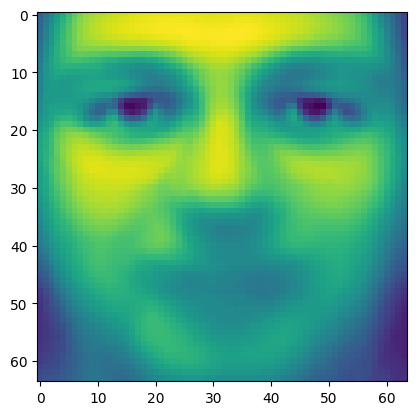

In [186]:
avg_face = np.zeros(64*64)    
for face in images:
    face_vec = face.flatten()
    #face_vec = face_vec.reshape(face_vec.shape[0], 1)
    avg_face += face_vec

avg_face = avg_face/len(images)
avg_face_img = avg_face.reshape(64, 64)
plt.imshow(avg_face_img)

### Rozdielny trenovacich oproti priemernej tvary

In [187]:
face_train_diffs = list()
for face in images:
    face_vec = face.flatten()
    face_train_diffs.append(face_vec - avg_face)

### Vypocitaj eigenfaces

In [188]:
A = np.matrix([i for i in face_train_diffs]).T
U, S, VT = np.linalg.svd(A, full_matrices=0)
U.shape

(4096, 400)

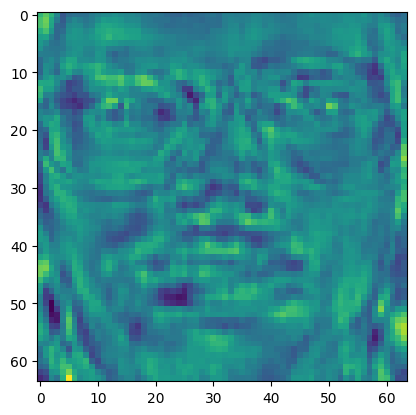

In [189]:
plt.imshow(U[:, 100].reshape(64, 64))

### Rozdielny nasich oproti priemernej tvary

In [190]:
face_diffs = dict()
for name, face in faces.items():
    face = cv2.blur(face,(5,5))
    face_vec = face.flatten()
    face_diffs[name] = face_vec - avg_face

### Vypocitaj koeficienty eigenfaces pre jednotlive tvare

In [191]:
%%time
face_vals = dict()
#modes = [5, 6, 7, 8]
modes = [6, 7]
for name, face in face_diffs.items():
    val = (np.ravel(U[:, modes].T @ face))
    face_vals[name] = val

CPU times: total: 15.6 ms
Wall time: 18 ms


AIN extra_Alexander Simko_align.jpg        MAT_pekar1_align.jpg                       16.5834520700467962
AIN extra_Andrej Lucny_align.jpg           INF_Rastislav Kralovic_align.jpg           17.1683189025198821
AIN extra_Barbora Cimrova_align.jpg        KJFB_Marta Richtarikova_align.jpg          48.0571208311313427
AIN extra_Damas Gruska_align.jpg           KDMFI_vankus1_align.jpg                    7.5316429154700959
AIN extra_Dusan Guller_align.jpg           KJFB_Pavol Bartos PhD_align.jpg            27.1458347013825225
AIN extra_Frantisek Gyarfas_align.jpg      MAT_guba1_align.jpg                        39.2323386704446548
AIN extra_Jan Komara_align.jpg             KTVS_leginusova1_align.jpg                 38.7135451649026905
AIN extra_Lubica Benuskova_align.jpg       AIN_Zuzana Cernekova_align.jpg             93.4150626403104383
AIN extra_Maria Markosova_align.jpg        KJFB_Miroslav Jeskovsky PhD_align.jpg      31.6855114221279237
AIN extra_Martin Takac_align.jpg           MAT_

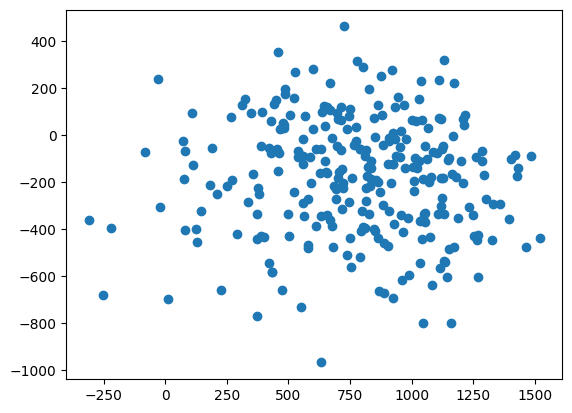

In [192]:
pca = []
cols = []
for name1, val1 in face_vals.items():
    best_dist = float("inf")
    pca.append(val1)
    best_name = ""
    for name2, val2 in face_vals.items():
        if name1 != name2 and np.linalg.norm(val1 - val2) < best_dist:

            best_dist = np.linalg.norm(val1 - val2)
            best_name = name2
    #print("Najpodobnejsia tvar k", name1, "je", best_name, best_dist)
    print(f"{name1:42} {best_name:42} {best_dist:1.18}")

pca = np.array(pca)
print(pca.shape)
plt.scatter(x=pca[:, 0], y=pca[:, 1])

In [193]:
names = []
vals = []
for name, face in face_vals.items():
    names.append(name)
    vals.append(face)

### Hľadanie lakťa na celych dátach

C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

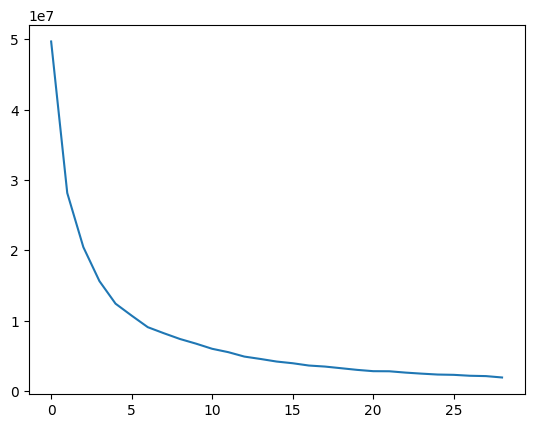

In [194]:
iner = []
for i in range(1,30):
    kmeans = KMeans(n_clusters=i, random_state=3, algorithm="lloyd").fit(vals)
    iner.append(kmeans.inertia_)

plt.plot(iner)

In [195]:
for name1, val1 in face_vals.items():
    best_dist = float("inf")
    best_name = ""
    for name2, val2 in face_vals.items(): 
        if name1 != name2 and np.linalg.norm(val1 - val2) < best_dist:
            best_dist = np.linalg.norm(val1 - val2)
            best_name = name2
    #print("Najpodobnejsia tvar k", name1, "je", best_name, best_dist)
    print(f"{name1:42} {best_name:42} {best_dist:1.18}")
            


AIN extra_Alexander Simko_align.jpg        MAT_pekar1_align.jpg                       16.5834520700467962
AIN extra_Andrej Lucny_align.jpg           INF_Rastislav Kralovic_align.jpg           17.1683189025198821
AIN extra_Barbora Cimrova_align.jpg        KJFB_Marta Richtarikova_align.jpg          48.0571208311313427
AIN extra_Damas Gruska_align.jpg           KDMFI_vankus1_align.jpg                    7.5316429154700959
AIN extra_Dusan Guller_align.jpg           KJFB_Pavol Bartos PhD_align.jpg            27.1458347013825225
AIN extra_Frantisek Gyarfas_align.jpg      MAT_guba1_align.jpg                        39.2323386704446548
AIN extra_Jan Komara_align.jpg             KTVS_leginusova1_align.jpg                 38.7135451649026905
AIN extra_Lubica Benuskova_align.jpg       AIN_Zuzana Cernekova_align.jpg             93.4150626403104383
AIN extra_Maria Markosova_align.jpg        KJFB_Miroslav Jeskovsky PhD_align.jpg      31.6855114221279237
AIN extra_Martin Takac_align.jpg           MAT_

C:\Users\user2\Desktop\pridav\eigenfaces\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


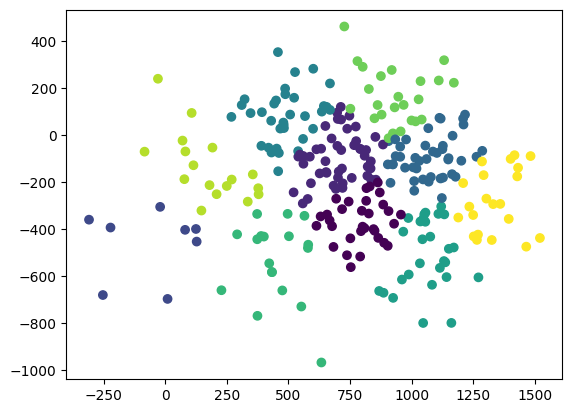

In [197]:
kmeans = KMeans(n_clusters=10, random_state=0, algorithm="lloyd").fit(pca)
plt.scatter(x=pca[:, 0], y=pca[:, 1], c=kmeans.labels_)

In [ ]:
kmeans.labels_